In [2]:
import os, glob
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### View meteorological, sapflow, & dendrometer data at US-Me6

In [60]:
# readin meta data
meta_data = pd.read_csv('../data/Me6_dendrometer_metadata.csv',index_col=0)
meta_data

,sapflowID,dendrometerID,organ,insallation_date,notes
TreeID,,,,,
701,1,92223137,trunk,6/15/22,NaN
702,2,92223134,trunk,6/15/22,NaN
703,3,92223806,trunk,8/29/22,NaN
704,4,92223136,trunk,6/15/22,NaN
704,4,92223808,branch,8/29/22,NaN
705,5,92223143,trunk,8/29/22,NaN
707,7,92223132,trunk,6/15/22,NaN
707,7,92223807,branch,8/29/22,NaN
708,8,92223155,trunk,8/29/22,NaN


In [47]:
# readin meteorological data
start_date = datetime(2022,7,1,0,0,0)
end_date = datetime(2022,8,31,23,30,0)
freq = '30min'

in_dir = '../data/'
in_file = in_dir + 'US-Me6_HH_202207010000_202209010000.csv'
met = pd.read_csv(in_file,header=0, squeeze=True)
met.index = pd.date_range(start_date,end_date,freq=freq)
met[met<-9000]=np.NaN
#met['vpd'] = VPD(met[t],met[rh])

In [86]:
# readin sapflow data
start_date = datetime(2022,1,14,0,0,0)
end_date = datetime(2022,9,1,23,30)
freq = '30min'

in_dir = '../data/'
in_file=in_dir + 'USMe6_transpiration_2022_14_244_30min_LRH.csv'
sapflow = pd.read_csv(in_file,header=0,squeeze=True)
sapflow[sapflow<-9000]=np.NaN
sapflow.index = pd.date_range(start_date,end_date,freq=freq)

In [87]:
# readin processed dendrometer data
st = datetime(2022,7,1) 
dendro = pd.DataFrame()

in_dir = '../data/dendrometer/2022-08-29/raw/'
for file in sorted(glob.iglob(f'{in_dir}'+'data*.csv')):
    idx = file[40:48]
    df = pd.read_csv(file,sep = ';',decimal=',',header=None,index_col=1, parse_dates=True, squeeze=True)
    dendro[idx] = df[6][st:]-df[6][st]

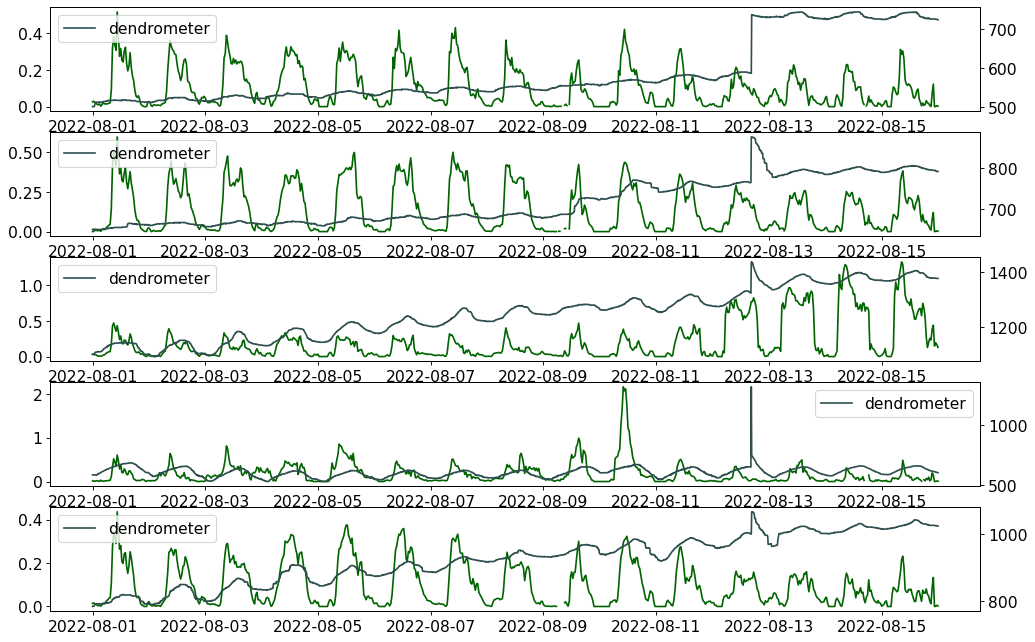

In [108]:
# plot sapflow and dendrometer data
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 14})

start_date = datetime(2022,8,1); 
end_date = datetime(2022,8,16)

treeIDs = [701,702,704,707,710]
meta_data_tree = meta_data.loc[meta_data['organ']=='trunk']

for i,t in enumerate(treeIDs):

    ax1 = plt.subplot(5,1,i+1)
    ax1.plot(sapflow['u_'+str(meta_data_tree['sapflowID'][t])+'[cm3 s-1]'][start_date:end_date],color='darkgreen',label='Saflow')
    ax2 = ax1.twinx()
    ax2.plot(dendro[str(meta_data_tree['dendrometerID'][t])][start_date:end_date],color='darkslategrey',label='dendrometer')
    plt.legend()
    

In [64]:
print(meta_data['dendrometerID'][701])

92223137


In [85]:
sapflow['u_4[cm3 s-1]']
meta_data['sapflowID'][705]

5